In [1]:
# load some extensions / magic...
%load_ext hamilton.plugins.jupyter_magic

/Users/stefankrawczyk/.pyenv/versions/knowledge_retrieval-py39/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [68]:
%reload_ext hamilton.plugins.jupyter_magic

In [2]:
# import the base libraries
from hamilton import driver

Driver dr has an adapter passed, skipping rebuild.
Rebuilt dr2 with module joke, using config {}
Rebuilt dr3 with module joke, using config {}


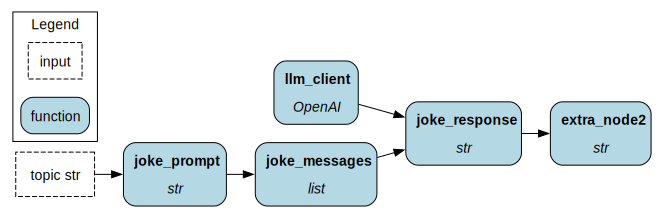

In [74]:
%%with_functions -m joke
# The above directive does three things: 
# 1. it creates a module with the contents of this cell
# 2. it imports the module under the name `joke`.
# 3. if changes are made to the module, it will be reloaded automatically. If you constructed a driver with this module, you won't need to re-create it (in most cases).
# %%write_file joke.py
# Once you are happy with your code, you can write it to a file using the `write_file` magic command, thereby creating a module that can be imported elsewhere.
from typing import List

import openai


def llm_client() -> openai.OpenAI:
    return openai.OpenAI()


def joke_prompt(topic: str) -> str:
    return f"Tell me a short joke about {topic}"


def joke_messages(joke_prompt: str) -> List[dict]:
    return [{"role": "user", "content": joke_prompt}]


def joke_response(llm_client: openai.OpenAI,
                  joke_messages: List[dict]) -> str:
    response = llm_client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=joke_messages,
    )
    return response.choices[0].message.content

def extra_node2(joke_response: str) -> str:
    return f"Extra node2: {joke_response}"

In [61]:
from hamilton.lifecycle import PrintLn
dr = (
        driver.Builder()
        .with_modules(joke)
        .with_config({"dummy": "config"})
        .with_adapters(PrintLn())
        .build()
    )
print(dr.execute(["joke_response"],
                 inputs={"topic": "ice cream"}))

Executing node: llm_client.
Finished debugging node: llm_client in 10.3ms. Status: Success.
Executing node: joke_prompt.
Finished debugging node: joke_prompt in 15.3μs. Status: Success.
Executing node: joke_messages.
Finished debugging node: joke_messages in 34.1μs. Status: Success.
Executing node: joke_response.
Finished debugging node: joke_response in 653ms. Status: Success.
{'joke_response': "Why don't ice creams ever get invited to parties?\nBecause they always melt and make a big mess!"}


In [54]:
print(dr.execute(["joke_response"],
                 inputs={"topic": "ice cream"}))

Executing node: llm_client.
Finished debugging node: llm_client in 10.4ms. Status: Success.
Executing node: joke_prompt.
Finished debugging node: joke_prompt in 17.2μs. Status: Success.
Executing node: joke_messages.
Finished debugging node: joke_messages in 12.6μs. Status: Success.
Executing node: joke_response.
Finished debugging node: joke_response in 607ms. Status: Success.
{'joke_response': 'Why did the ice cream go to therapy? It had too many sprinkles of anxiety!'}


In [75]:
print(dr.execute(["extra_node2"],
                 inputs={"topic": "ice cream"}))

Executing node: llm_client.
Finished debugging node: llm_client in 10.1ms. Status: Success.
Executing node: joke_prompt.
Finished debugging node: joke_prompt in 35μs. Status: Success.
Executing node: joke_messages.
Finished debugging node: joke_messages in 45.1μs. Status: Success.
Executing node: joke_response.
Finished debugging node: joke_response in 717ms. Status: Success.
Executing node: extra_node2.
Finished debugging node: extra_node2 in 15μs. Status: Success.
{'extra_node2': 'Extra node2: Why did the ice cream go to the gym?\n\nBecause it needed to get a sundae workout!'}


In [18]:
dr2 = (
        driver.Builder()
        .with_modules(joke)
        .build()
    )

{'extra_node': 'Extra node: Why was the math book sad when eating ice cream? \nBecause it had too many problems to solve!'}


In [28]:
print(dr2.execute(["extra_node2"],
                 inputs={"topic": "ice cream"}))

{'extra_node2': 'Extra node: Why did the ice cream go to therapy?\n\nBecause it had a rocky road!'}


Rebuilt dr3 with module hello, using config {}


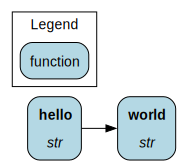

In [72]:
%%with_functions -m hello

def hello()->str:
    return "hi"

def world(hello: str)-> str:
    return f"{hello} world3"

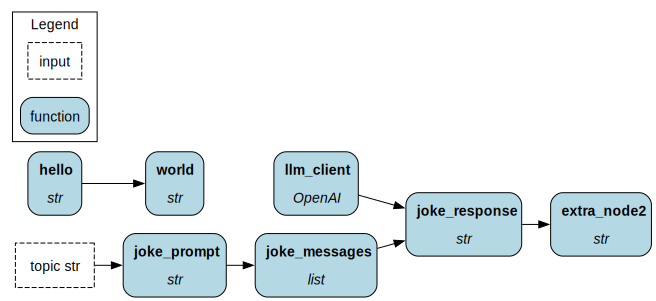

In [66]:
dr3 = (
        driver.Builder()
        .with_modules(joke, hello)
        .build()
    )
dr3.display_all_functions()

In [73]:
dr3.execute(["world"], inputs={})

{'world': 'hi world3'}